# Machine Learning Assignment Code

<b>I have Implemented Linear regression, Ridge Regression, Lasso Regression</b>

## Assignment Brief

The task is based on an energy efficiency prediction problem which is a regression problem. More specifically, you are required to perform an analysis using different building shapes, with different characteristics, and predict the heating load of the building. The buildings differ with respect to the glazing area, the glazing area distribution, the orientation, and other aspects comprised in the dataset.
The dataset (below) for this task includes 9 features, denoted by X0, X1, ..., X8, and an outcome variable Y which needs to be predicted. The dataset contains missing values. Here is the meaning of the 10 variables:

<li>X0:  Category of the building</li>
<li>X1: Relative Compactness</li>
<li>X2: Surface Area</li>
<li>X3: Wall Area</li>
<li>X4: Roof Area</li>
<li>X5: Overall Height</li>
<li>X6: Orientation</li>
<li>X7: Glazing Area</li>
<li>X8: Glazing Area Distribution</li>
<li>Y: Heating Load</li>

You are required to perform this analysis comprising: data inspection and visualisation, data preprocessing including data splitting in 70% training data, and 30% test data, data transformations you consider useful for this task, treatment of missing values, feature selection if you consider it useful for helping you achieve a better performance, etc. The analysis should include developing the predictive models based on the following algorithms already studied in this module, or that are going to be studied such as neural networks: simple Linear Regression, Ridge Regression, Lasso Regression, Elastic Net Regression, Polynomial Regression with regularisation, and Neural Network. These models (except simple Linear Regression which needs only to be simply trained) will be tuned using the training set. The training set will be used to select the best 2 models. Only these 2 best models will be evaluated on the test set.

The code, comments and explanations will be provided in a Python Jupyter notebook, which should include also the results of running your notebook.

(You can read the dataset simply using pandas function read_csv as follows: data = pd.read_csv("datcw_na.csv")

Note regarding working in a team or individually, and what you need to submit:


You can work and submit in a team of 2 students - in which case you should choose a team leader.  As a team you should tackle the task above entirely. Include the names and student numbers of both of the team members on top of the Jupyter notebook. The team leader must perform the submission from their account (hence only once per team, for both students) on VLE. (You shouldn't submit twice, in each student's account.)

Or you can also work and submit alone for this assignment. In this case you are required to choose and develop only 3 models out of the Linear Regression, Ridge Regression, Lasso Regression, Elastic Net Regression, Polynomial Regression with regularisation, and Neural Network. Include your name and student number on top of the Jupyter notebook followed by the mention "I worked and submitted alone".

## Setup

Importing useful modules. Function to save figures is also implemented here. Also it checks if python 3.5 or later is installed and it checks if sckitlearn version 0.20 or later is installed

In [1]:
#Setup from lab 6 with minor changes
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn import preprocessing
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#Function that would save figures to the folder containing the notebook
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Getting the data from the csv file and saving it to a variable and getting the shape of the variable

In [2]:
#Used to read the csv file that contains the data
csvFile = pd.read_csv('datcw_na.csv')
csvFile.shape

(768, 10)

## Data Inspection And Vizualisation Before Preprocessing

In [3]:
#Prints the first 5 columns of the data from the csv file
csvFile.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [4]:
#Returns the count,mean,std,min,25%,50%,75%,max for each feature excluding x0
csvFile.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


Creating a new variable to save the csvFile to it so it can be modified to visualise data correctly

In [5]:
csvFilePlotting = csvFile

In X0 c1,c2,c3 are not values so replace c1 with 1 and c2 with 2 and c3 with 3

In [6]:
csvFilePlotting ["X0"] = csvFilePlotting ["X0"].replace(to_replace = "C1", value = 1)
csvFilePlotting ["X0"] = csvFilePlotting ["X0"].replace(to_replace = "C2", value = 2)
csvFilePlotting ["X0"] = csvFilePlotting ["X0"].replace(to_replace = "C3", value = 3)

Plotting histograms of the features within the excel file that contains the data before pre processing

Saving figure attribute_histogram_plots_before_preprocessing


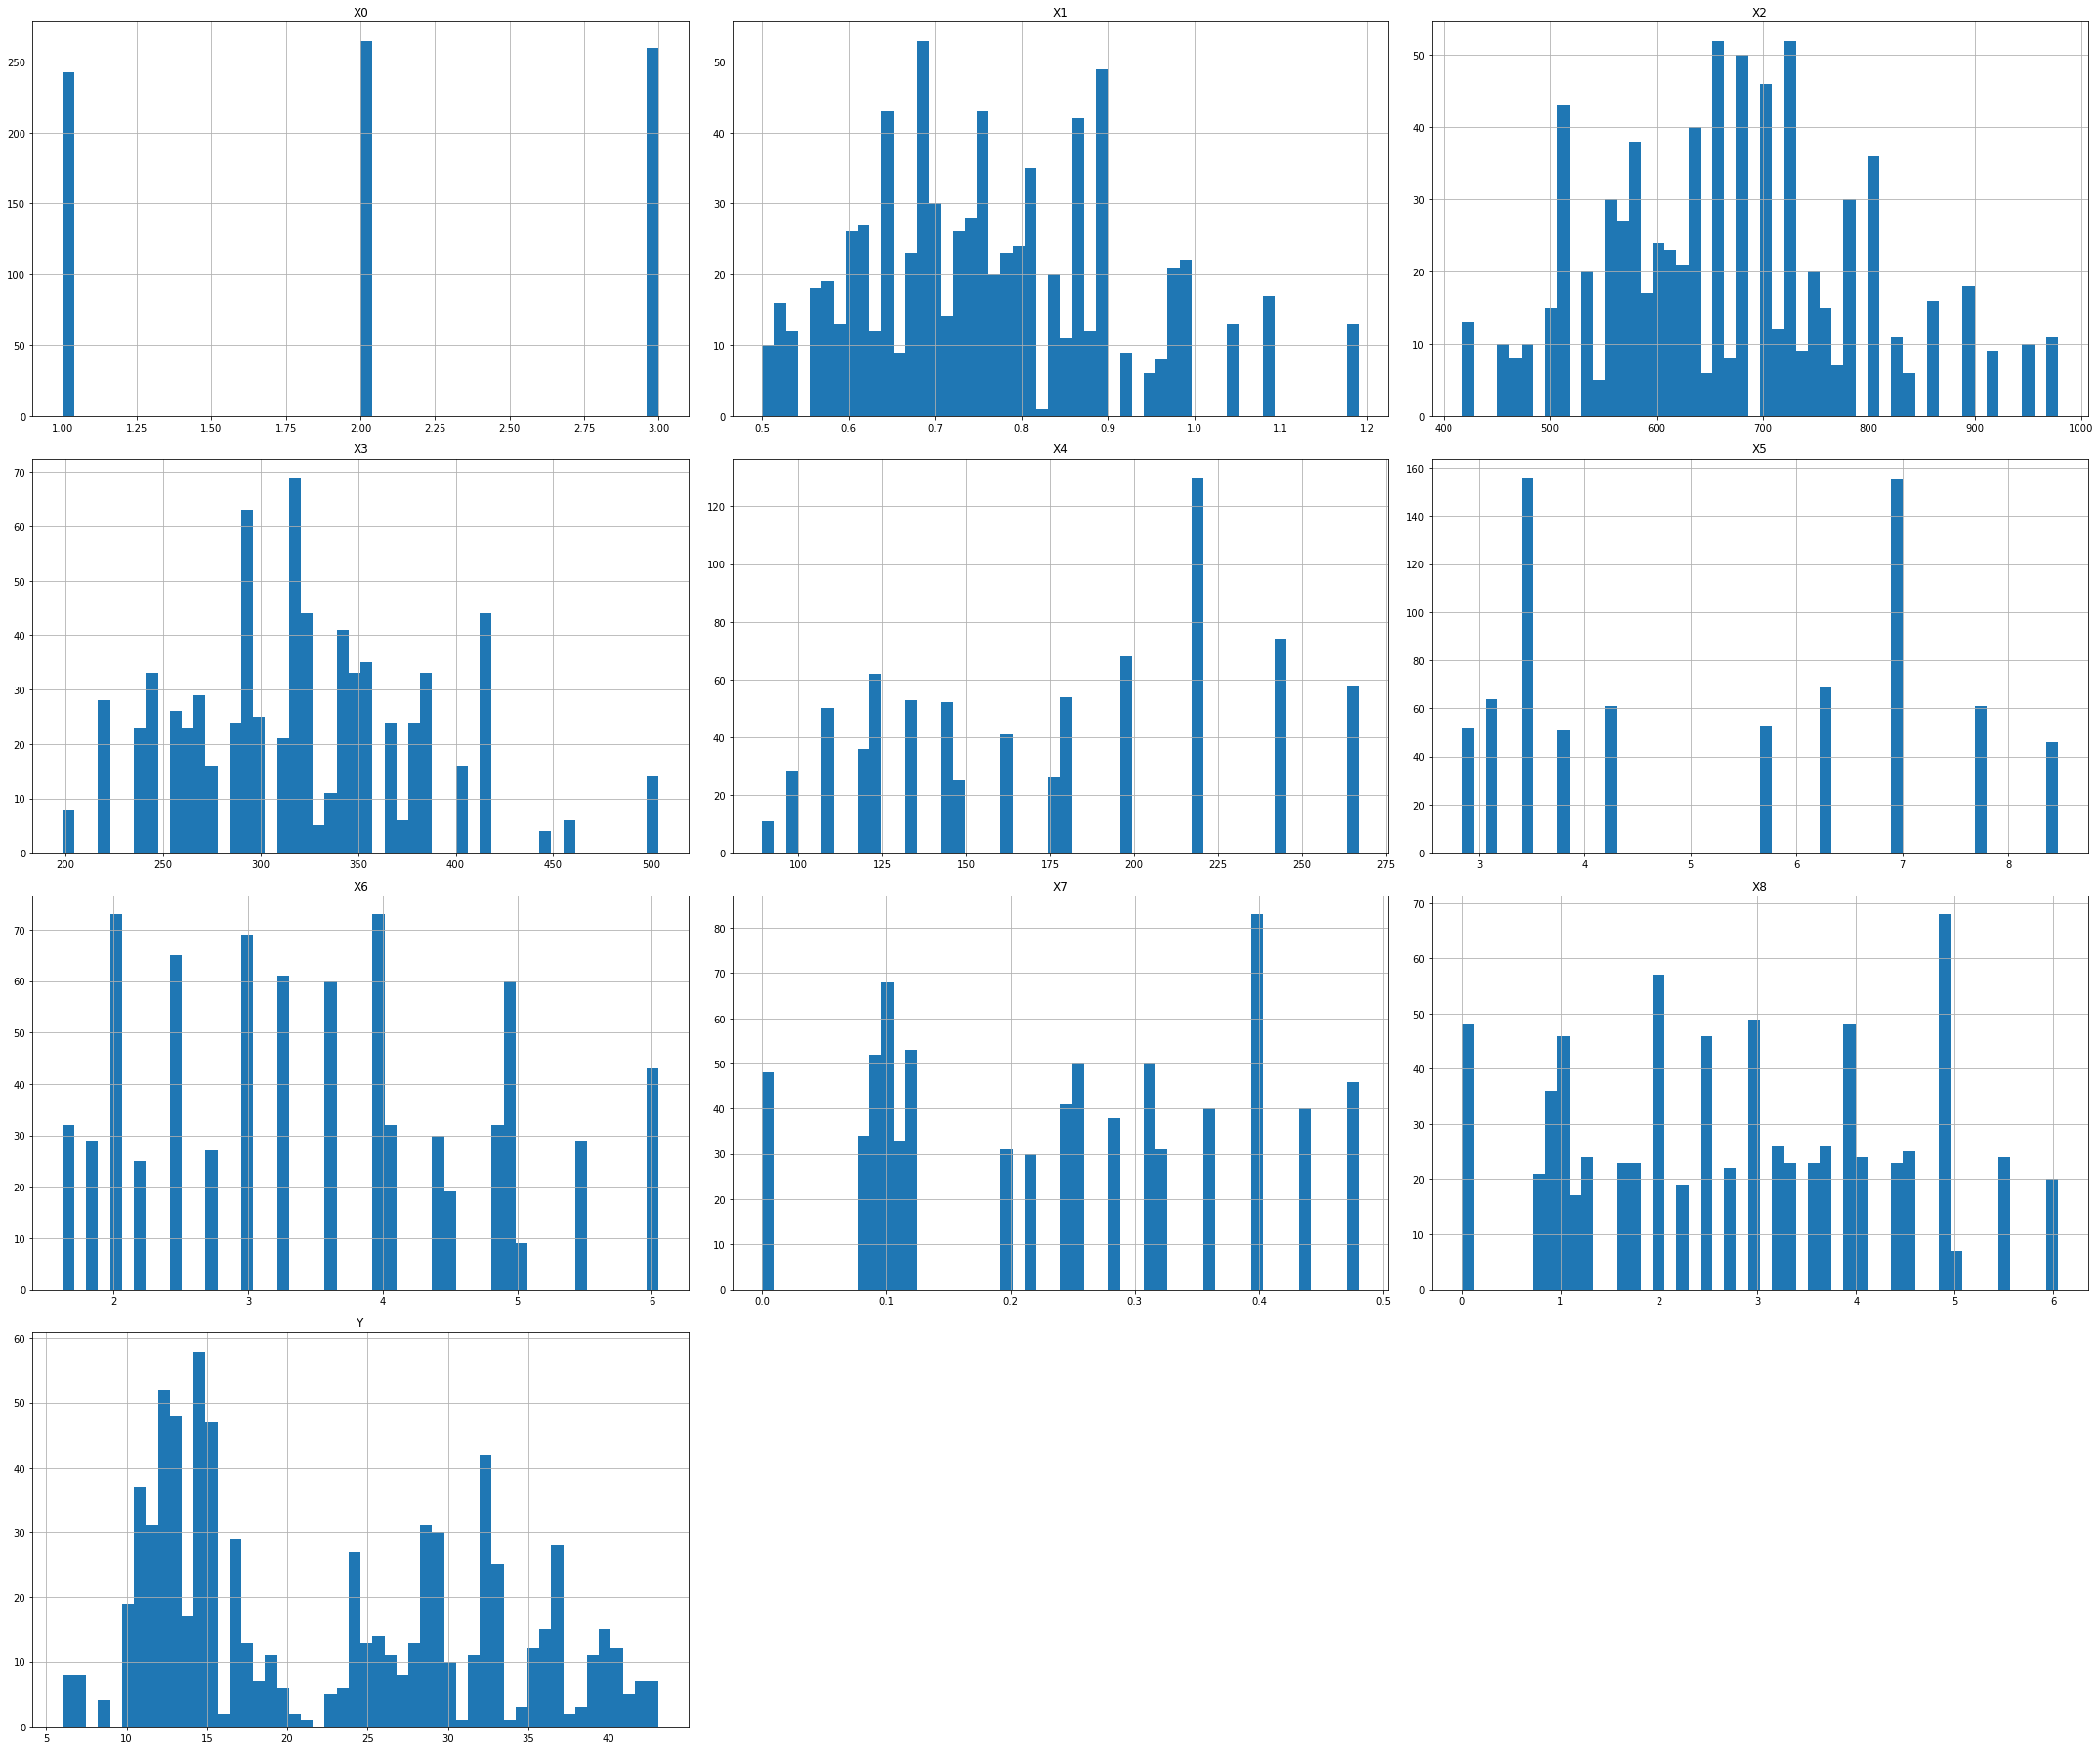

In [7]:
#Returns the data of each feature/attribute as a histogram showing bars of frequencies of numeric values
#Saves the histogram to the folder that contains the notebook
%matplotlib inline
import matplotlib.pyplot as plt
csvFilePlotting.hist(bins=50, figsize=(30,25))
save_fig("attribute_histogram_plots_before_preprocessing")
plt.show()

Plotting each attribute against each other before pre processing to visualise data and correlations

Saving figure scatter_matrix_plot_before_pre_processing


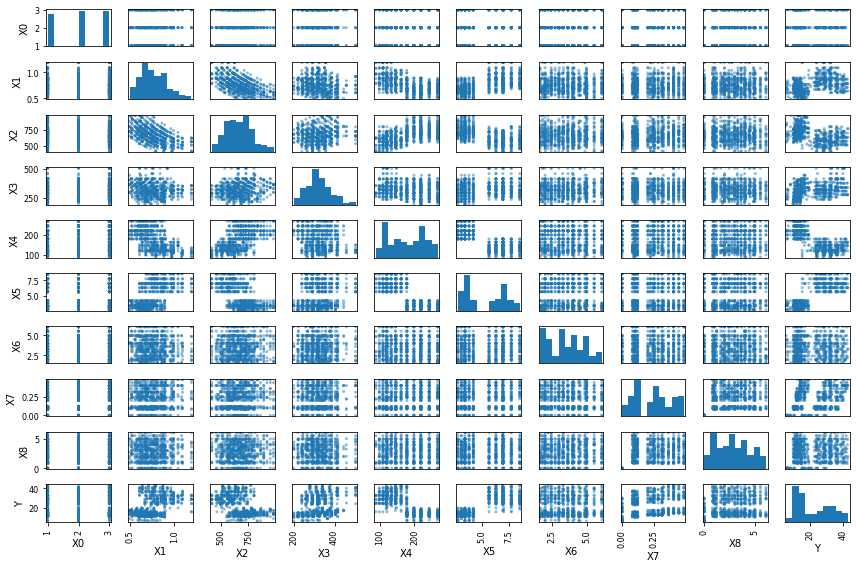

In [8]:
#Plotting all attributes against each other to see correlation

from pandas.plotting import scatter_matrix

attributes = ["X0", "X1","X2","X3","X4","X5","X6","X7","X8","Y"]
scatter_matrix(csvFilePlotting[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot_before_pre_processing")

## Data Cleaning/Pre Processing And Data Transformation

<h3><b> One Hot Encoder On X0 making 3 new categories for c1, c2, c3 </b></h3>


<b>One Hot Encoder used to handle categorical attributes and makes the training data more useful and expressive hence I have decided to use it on Column X0</b>

<b>Using One Hot Encoder I am transforming X0 into 3  new categories c1,c2,c3 which if in x0 an element is c1 then in category c1 at the same index  it would be 1 and c2 and c3 would be 0 </b> 

In [9]:
#Making a new variable and saving x0 categorty into the new variable 
csvFile_category = csvFile[["X0"]]
csvFile_category.head(10)
csvFile_category

,X0
0,3
1,1
2,1
3,2
4,1
...,...
763,3
764,2
765,1
766,3


In [10]:
#This would get the values in the category x0 and put it in a 2d array which has 3 elements in each index so if 
#C3 is the first value in x0
#Then the first index would contain [0.,0.,1.]
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
csvFile_category_1hot = cat_encoder.fit_transform(csvFile_category)
csvFile_category_1hot = csvFile_category_1hot.toarray()


In [11]:
#Create c1 array and get the all values in 2d array [x][0] 
#And append it to the array then add the values in the array to a new category called c1 in the dataframe
c1 = []
for x in range(len(csvFile_category_1hot)):
    c1.append(csvFile_category_1hot[x][0])
csvFile['C1'] = c1

#Create c2 array and get all the values in 2d array [x][1] 
#And append it to the array then add the values in the array to a new category called c2 in the dataframe
c2 = []
for x in range(len(csvFile_category_1hot)):
    c2.append(csvFile_category_1hot[x][1])
csvFile['C2'] = c2

#Create c3 array and get all the values in 2d array [x][2] 
#And append it to the array then add the values in the array to a new category called c3 in the dataframe
c3 = []
for x in range(len(csvFile_category_1hot)):
    c3.append(csvFile_category_1hot[x][2])
csvFile['C3'] = c3

#Drop x0 since you have the new coloumns c1,c2,c3 which are derived from x0
csvFile = csvFile.drop("X0",axis=1)

#Display the first 5 columns of the altered dataframe
csvFile.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y,C1,C2,C3
0,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55,0.0,0.0,1.0
1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55,1.0,0.0,0.0
2,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55,1.0,0.0,0.0
3,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55,0.0,1.0,0.0
4,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84,1.0,0.0,0.0


Display some information about the new categories and some of the values they contain to make sure it has worked properly

In [12]:
cat_encoder.categories_

[array([1, 2, 3], dtype=int64)]

In [13]:
csvFile['C1'].head()

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: C1, dtype: float64

In [14]:
csvFile['C2'].head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: C2, dtype: float64

In [15]:
csvFile['C3'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: C3, dtype: float64

<b> Now I will  be checking number of empty cells, null cells,  NaN cells and cells contating 0 in each category. Then I would find the percentage of them compared to the number of cells in that category and if the percentage is less than 50% then I would replace those specific cells with the category median else I will drop the column </b>

In [16]:
#Find number of empty cells or nan cells or null cells or cells that contain 0 in X1 column and if percentage is lower than 50% 
#Then replace those cells with the coloumn median else 
#If the percentage is higher than 50% then drop the coloumn as there is too much data missing within the coloumn
PercentageMissingX1 = (csvFile["X1"]).isnull().sum() + (csvFile["X1"] == 0).sum()/(csvFile["X1"]).sum() * 100    
if(PercentageMissingX1 < 50.0):
    csvFile["X1"] = csvFile["X1"].replace(to_replace = np.nan, value = csvFile["X1"].median())
    csvFile["X1"] = csvFile["X1"].replace(to_replace = 0.0, value = csvFile["X1"].median())
else:
    csvFile = csvFile.drop("X1",axis=1)
print(csvFile["X1"])

0      1.19
1      1.19
2      0.88
3      0.79
4      0.89
       ... 
763    0.52
764    0.50
765    0.68
766    0.50
767    0.50
Name: X1, Length: 768, dtype: float64


In [17]:
#Find number of empty cells or nan cells or null cells or cells that contain 0 in X2 column and if percentage is lower than 50% 
#Then replace those cells with the coloumn median else 
#If the percentage is higher than 50% then drop the coloumn as there is too much data missing within the coloumn
PercentageMissingX2 = (csvFile["X2"]).isnull().sum() + (csvFile["X2"] == 0).sum()/(csvFile["X2"]).sum() * 100    
if(PercentageMissingX2 < 50.0):
    csvFile["X2"] = csvFile["X2"].replace(to_replace = np.nan, value = csvFile["X2"].median())
    csvFile["X2"] = csvFile["X2"].replace(to_replace = 0.0, value = csvFile["X2"].median())
else:
    csvFile = csvFile.drop("X2",axis=1)
print(csvFile["X2"])

0      622.55
1      622.55
2      463.05
3      509.36
4      507.15
        ...  
763    948.64
764    727.65
765    889.35
766    654.88
767    800.42
Name: X2, Length: 768, dtype: float64


In [18]:
#Find number of empty cells or nan cells or null cells or cells that contain 0 in X3 column and if percentage is lower than 50% 
#Then replace those cells with the coloumn median else 
#If the percentage is higher than 50% then drop the coloumn as there is too much data missing within the coloumn
PercentageMissingX3 = (csvFile["X3"]).isnull().sum() + (csvFile["X3"] == 0).sum()/(csvFile["X3"]).sum() * 100    
if(PercentageMissingX3 < 50.0):
    csvFile["X3"] = csvFile["X3"].replace(to_replace = np.nan, value = csvFile["X3"].median())
    csvFile["X3"] = csvFile["X3"].replace(to_replace = 0.0, value = csvFile["X3"].median())
else:
    csvFile = csvFile.drop("X3",axis=1)
print(csvFile["X3"])

0      315.32
1      323.40
2      291.06
3      291.06
4      385.39
        ...  
763    277.83
764    315.32
765    404.25
766    363.82
767    404.25
Name: X3, Length: 768, dtype: float64


In [19]:
#Find number of empty cells or nan cells or null cells or cells that contain 0 in X4 column and if percentage is lower than 50% 
#Then replace those cells with the coloumn median else 
#If the percentage is higher than 50% then drop the coloumn as there is too much data missing within the coloumn
PercentageMissingX4 = (csvFile["X4"]).isnull().sum() + (csvFile["X4"] == 0).sum()/(csvFile["X4"]).sum() * 100    
if(PercentageMissingX4 < 50.0):
    csvFile["X4"] = csvFile["X4"].replace(to_replace = np.nan, value = csvFile["X4"].median())
    csvFile["X4"] = csvFile["X4"].replace(to_replace = 0.0, value = csvFile["X4"].median())
else:
    csvFile = csvFile.drop("X4",axis=1)
print(csvFile["X4"])

0       89.31
1      109.15
2       99.23
3      121.28
4      121.28
        ...  
763    218.30
764    266.80
765    178.60
766    218.30
767    218.30
Name: X4, Length: 768, dtype: float64


In [20]:
#Find number of empty cells or nan cells or null cells or cells that contain 0 in X5 column and if percentage is lower than 50% 
#Then replace those cells with the coloumn median else 
#If the percentage is higher than 50% then drop the coloumn as there is too much data missing within the coloumn
PercentageMissingX5 = (csvFile["X5"]).isnull().sum() + (csvFile["X5"] == 0).sum()/(csvFile["X5"]).sum() * 100    
if(PercentageMissingX5 < 50.0):
    csvFile["X5"] = csvFile["X5"].replace(to_replace = np.nan, value = csvFile["X5"].median())
    csvFile["X5"] = csvFile["X5"].replace(to_replace = 0.0, value = csvFile["X5"].median())
else:
    csvFile = csvFile.drop("X5",axis=1)
print(csvFile["X5"])

0      7.00
1      7.70
2      5.67
3      6.30
4      7.70
       ... 
763    4.24
764    3.47
765    3.47
766    3.15
767    2.84
Name: X5, Length: 768, dtype: float64


In [21]:
#Find number of empty cells or nan cells or null cells or cells that contain 0 in X6 column and if percentage is lower than 50% 
#Then replace those cells with the coloumn median else 
#If the percentage is higher than 50% then drop the coloumn as there is too much data missing within the coloumn
PercentageMissingX6 = (csvFile["X6"]).isnull().sum() + (csvFile["X6"] == 0).sum()/(csvFile["X6"]).sum() * 100    
if(PercentageMissingX6 < 50.0):
    csvFile["X6"] = csvFile["X6"].replace(to_replace = np.nan, value = csvFile["X6"].median())
    csvFile["X6"] = csvFile["X6"].replace(to_replace = 0.0, value = csvFile["X6"].median())
else:
    csvFile = csvFile.drop("X6",axis=1)
print(csvFile["X6"])

0      1.98
1      3.00
2      4.40
3      4.05
4      2.00
       ... 
763    4.95
764    1.98
765    2.43
766    3.96
767    4.05
Name: X6, Length: 768, dtype: float64


In [22]:
#Find number of empty cells or nan cells or null cells or cells that contain 0 in X7 column and if percentage is lower than 50% 
#Then replace those cells with the coloumn median else 
#If the percentage is higher than 50% then drop the coloumn as there is too much data missing within the coloumn
PercentageMissingX7 = (csvFile["X7"]).isnull().sum() + (csvFile["X7"] == 0).sum()/(csvFile["X7"]).sum() * 100    
if(PercentageMissingX7 < 50.0):
    csvFile["X7"] = csvFile["X7"].replace(to_replace = np.nan, value = csvFile["X7"].median())
    csvFile["X7"] = csvFile["X7"].replace(to_replace = 0.0, value = csvFile["X7"].median())
else:
    csvFile = csvFile.drop("X7",axis=1)
print(csvFile["X7"])

0      0.24
1      0.24
2      0.24
3      0.24
4      0.24
       ... 
763    0.48
764    0.44
765    0.40
766    0.36
767    0.32
Name: X7, Length: 768, dtype: float64


In [23]:
#Find number of empty cells or nan cells or null cells or cells that contain 0 in X8 column and if percentage is lower than 50% 
#Then replace those cells with the coloumn median else 
#If the percentage is higher than 50% then drop the coloumn as there is too much data missing within the coloumn
PercentageMissingX8 = (csvFile["X8"]).isnull().sum() + (csvFile["X8"] == 0).sum()/(csvFile["X8"]).sum() * 100    
if(PercentageMissingX8 < 50.0):
    csvFile["X8"] = csvFile["X8"].replace(to_replace = np.nan, value = csvFile["X8"].median())
    csvFile["X8"] = csvFile["X8"].replace(to_replace = 0.0, value = csvFile["X8"].median())
else:
    csvFile = csvFile.drop("X8",axis=1)
print(csvFile["X8"])

0      2.97
1      2.97
2      2.97
3      2.97
4      2.97
       ... 
763    4.05
764    5.00
765    4.95
766    4.50
767    4.95
Name: X8, Length: 768, dtype: float64


## Data Inspection And Vizualisation After Preprocessing

In [24]:
#Prints the first 5 columns of the data from the csv file after data pre processing 
csvFile.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y,C1,C2,C3
0,1.19,622.55,315.32,89.31,7.00,1.98,0.24,2.97,15.55,0.0,0.0,1.0
1,1.19,622.55,323.40,109.15,7.70,3.00,0.24,2.97,15.55,1.0,0.0,0.0
2,0.88,463.05,291.06,99.23,5.67,4.40,0.24,2.97,15.55,1.0,0.0,0.0
3,0.79,509.36,291.06,121.28,6.30,4.05,0.24,2.97,15.55,0.0,1.0,0.0
4,0.89,507.15,385.39,121.28,7.70,2.00,0.24,2.97,20.84,1.0,0.0,0.0


In [25]:
#Returns the count,mean,std,min,25%,50%,75%,max for each feature including c1,c2,c3
csvFile.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y,C1,C2,C3
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,320.801354,176.564141,5.229766,3.527331,0.252852,2.989362,22.307201,0.316406,0.345052,0.338542
std,0.147093,120.863329,58.895224,51.280618,1.844813,1.245710,0.125542,1.424184,10.090196,0.465377,0.475695,0.473522
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.080000,0.810000,6.010000,0.000000,0.000000,0.000000
25%,0.650000,575.510000,286.650000,132.300000,3.470000,2.427500,0.120000,1.980000,12.992500,0.000000,0.000000,0.000000
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000,0.000000,0.000000,0.000000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500,1.000000,1.000000,1.000000
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000,1.000000,1.000000,1.000000


Plotting histograms of the features within the excel file that contains the data after pre processing

Saving figure attribute_histogram_plots_after_preprocessing


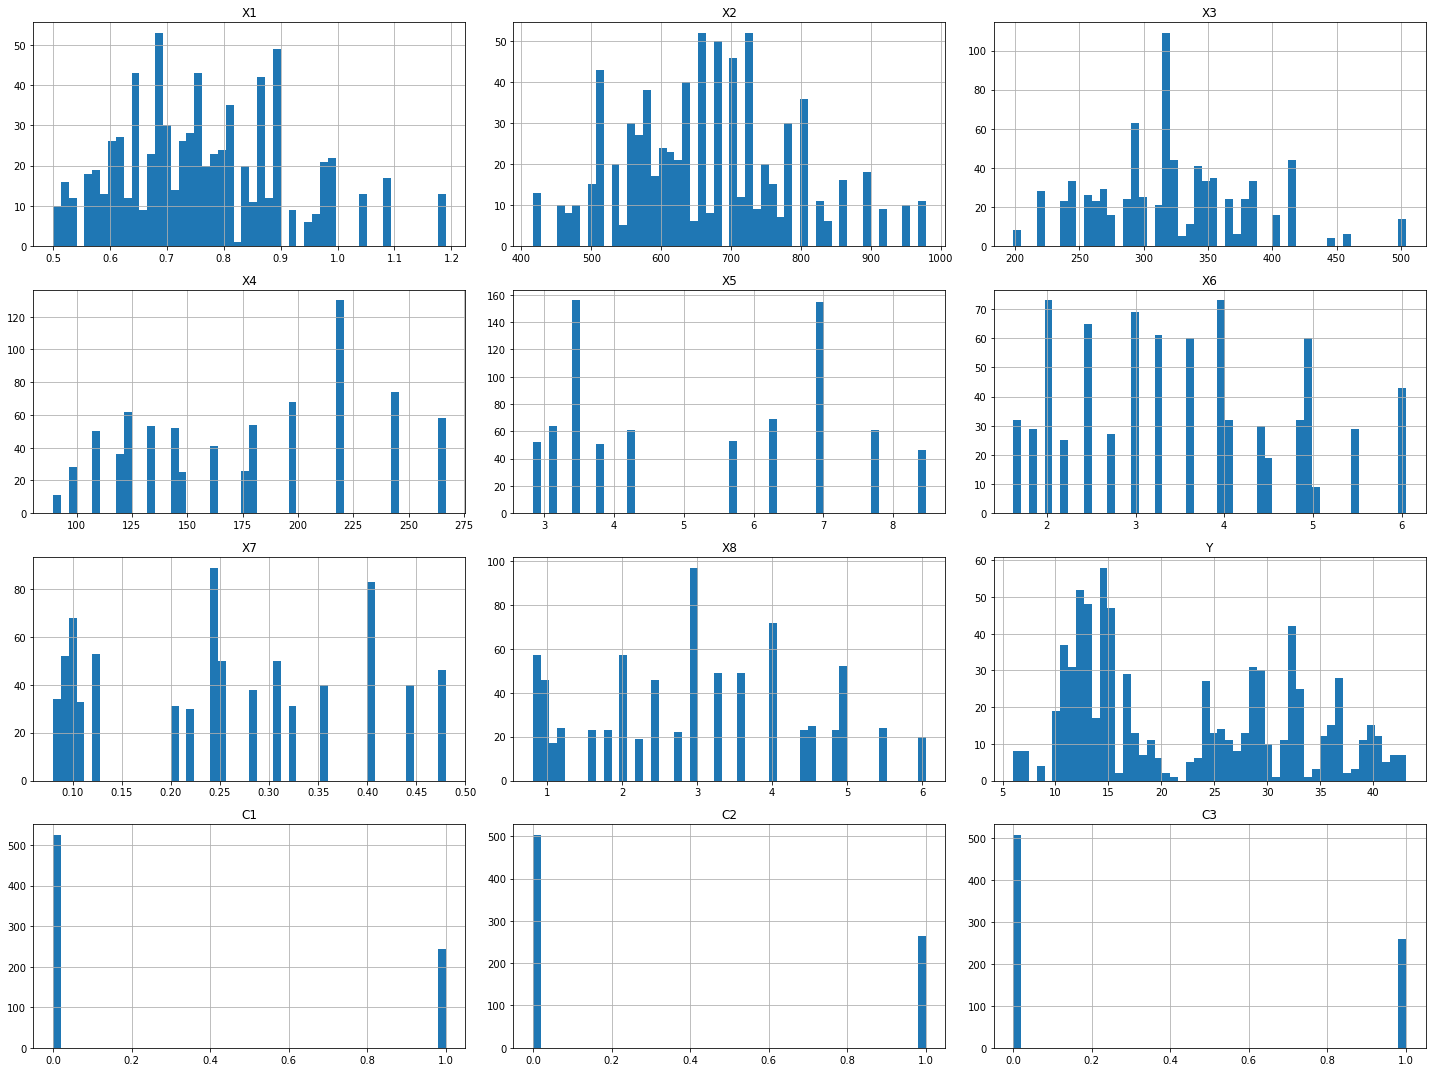

In [26]:
#Returns the data of each feature/attribute as a histogram showing bars of frequencies of numeric values
#Saves the values to the folder that contains the notebook
%matplotlib inline
import matplotlib.pyplot as plt
csvFile.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_after_preprocessing")
plt.show()

Plotting each attribute against each other after pre processing to visualise data and correlations

Saving figure scatter_matrix_plot_after_pre_processing


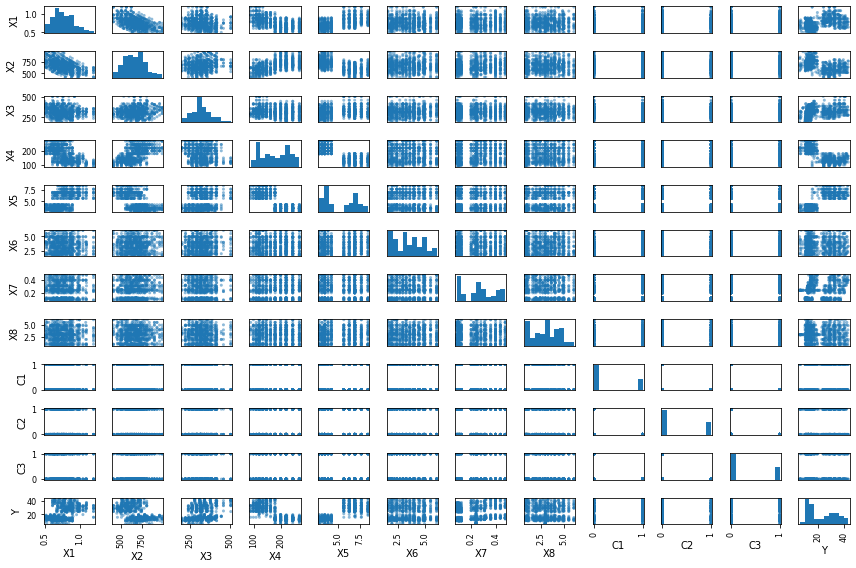

In [27]:
#Plotting all attributes against each other to see correlation

from pandas.plotting import scatter_matrix

attributes = ["X1","X2","X3","X4","X5","X6","X7","X8","C1","C2","C3","Y"]
scatter_matrix(csvFile[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot_after_pre_processing")

## Data Splitting - 70% Training Set And 30% Testing Set

In [28]:
#Makes the notebooks output the same after every run 
np.random.seed(42)

In [29]:
#Splits the data into train and test sets
#I will be using 70% of the data as training set and 30% percent of the data as testing set

from sklearn.model_selection import train_test_split
#Requires a 70% training set and a 30% test data
train_set, test_set = train_test_split(csvFile, test_size=0.3, random_state=42)

In [30]:
#Shows the training set data
train_set

,X1,X2,X3,X4,X5,X6,X7,X8,Y,C1,C2,C3
334,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99,15.08,0.0,0.0,1.0
139,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98,15.19,0.0,0.0,1.0
485,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00,32.31,0.0,1.0,0.0
547,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99,41.67,1.0,0.0,0.0
18,0.71,630.63,377.30,119.07,5.67,3.60,0.24,2.97,29.63,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.75,654.89,416.50,121.28,8.47,4.05,0.09,0.90,32.21,0.0,1.0,0.0
106,1.04,582.12,291.06,161.70,7.70,3.96,0.09,2.42,26.33,0.0,1.0,0.0
270,0.86,575.51,326.10,242.55,3.47,4.84,0.12,6.05,10.67,0.0,1.0,0.0
435,0.97,509.36,355.74,109.15,6.93,6.05,0.31,3.24,28.62,0.0,1.0,0.0


In [31]:
#Shows the test set data
test_set

,X1,X2,X3,X4,X5,X6,X7,X8,Y,C1,C2,C3
668,0.68,800.42,444.68,242.55,3.47,1.98,0.32,3.63,16.47,0.0,1.0,0.0
324,0.59,683.55,350.35,242.55,3.47,2.42,0.25,0.90,13.17,0.0,1.0,0.0
624,0.97,509.36,291.06,121.28,5.67,1.62,0.32,2.70,32.82,0.0,1.0,0.0
690,0.64,700.70,339.57,161.70,6.93,3.96,0.40,3.60,41.32,0.0,1.0,0.0
473,0.77,776.16,315.32,266.80,3.47,2.97,0.25,4.40,16.69,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.58,776.16,377.30,198.45,3.85,4.95,0.48,1.98,19.12,0.0,0.0,1.0
198,0.89,507.15,318.50,148.23,6.30,4.40,0.11,3.96,28.86,1.0,0.0,0.0
538,0.69,529.20,291.06,161.70,6.93,3.24,0.32,0.90,32.09,0.0,1.0,0.0
329,0.63,776.16,308.70,218.30,3.47,2.97,0.31,0.99,17.35,0.0,1.0,0.0


## Function To Display Scores

In [32]:
#display_scores will take a parameter and display the scores, mean and standard deivation for that speicifc parameter given 
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Linear Regression - Training

In [33]:
#Save y training to a variable on its own 
#And then drop y training from csvFile and save that to a new variable 
csvFile_labels = train_set["Y"].copy()
csvFile = train_set.drop("Y",axis=1)

In [34]:
#Using svd based method perform linear regression
#Fits the data using linear regression
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(csvFile,csvFile_labels)

LinearRegression()

In [35]:
#Predicting using linear regression and cross validation with 10 folds on the training set
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(linear_reg, csvFile, csvFile_labels,
                             scoring='neg_mean_squared_error', n_jobs=-1, cv=10)
#Display the scores,mean and standard deviation for the predictions from linear regression with cross validation
display_scores(lin_scores)

Scores: [-24.67464175 -21.74503628 -28.13635287 -22.28997271 -28.07107601
 -22.61574288 -23.80423704 -32.36382963 -33.46439933 -12.61887793]
Mean: -24.978416644211713
Standard deviation: 5.688472651154414


In [36]:
#Calculate the rmse scores for linear regression model
LinearRegression_rmse_scores = np.sqrt(-lin_scores)

In [37]:
#Diplsays the mean using rmse scores for the linear regression model
LinearRegression_rmse_scores.mean()

4.961495592112537

## Ridge Regression - Training


In [38]:
#Save y training to a variable on its own 
#And then drop y training from csvFile and save that to a new variable 
csvFile_labels = train_set["Y"].copy()
csvFile = train_set.drop("Y",axis=1)

In [39]:
#Save csvFile which does not have y category to X
X = csvFile
#Save csvFile_labels to y which only contains Y category
y = csvFile_labels

In [40]:
#Fits the training data using ridge regression
#Alpha is the strength of the regularisation 
#Cholesky chooses one of the possible methods to compute the model which is based on a closed form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=3, solver="cholesky", random_state=42)
ridge_reg.fit(csvFile, csvFile_labels)

Ridge(alpha=3, random_state=42, solver='cholesky')

In [41]:
#Predicting using ridge regression and gridsearch and cross validation with 10 folds 
#Gridsearch is used to fine tune the model
from sklearn.model_selection import GridSearchCV

#Values that it will use as the alpha when predicting to find the best alpha it performs at
param_grid = {'alpha': [0.1, 0.001, 0.5,0.15,0.2,0.25,0.3,0.35,0.4,0.45]}

ridge_reg = Ridge(random_state=42)
#Train across 10 folds 
grid_search_Ridge = GridSearchCV(ridge_reg, param_grid, cv=10, n_jobs=-1,
                           scoring='neg_mean_squared_error', return_train_score=True)
#Runs fit with all sets of alpha values
grid_search_Ridge.fit(csvFile, csvFile_labels)


GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.001, 0.5, 0.15, 0.2, 0.25, 0.3, 0.35,
                                   0.4, 0.45]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
#Gets the best alpha and returns it
grid_search_Ridge.best_params_

{'alpha': 0.2}

In [43]:
#Saves the results from the ridge regression predicition to cvres_ridge
cvres_Ridge = grid_search_Ridge.cv_results_

In [44]:
#Displays the mean and alpha values from the ridge regression predictions
for mean_score, params in zip(cvres_Ridge["mean_test_score"], cvres_Ridge["params"]):
    print(mean_score, params)

-24.975644099749076 {'alpha': 0.1}
-24.97838017274641 {'alpha': 0.001}
-24.980016131192134 {'alpha': 0.5}
-24.974893872931432 {'alpha': 0.15}
-24.974544915466538 {'alpha': 0.2}
-24.974581037977902 {'alpha': 0.25}
-24.974986716680622 {'alpha': 0.3}
-24.975747062540435 {'alpha': 0.35}
-24.976847792063097 {'alpha': 0.4}
-24.978275199616185 {'alpha': 0.45}


In [45]:
#Displays the RMSE and alpha values from the ridge regression predictions
for mean_score, params in zip(cvres_Ridge["mean_test_score"], cvres_Ridge["params"]):
    print(np.sqrt(-mean_score), params)

4.997563816475891 {'alpha': 0.1}
4.997837549655491 {'alpha': 0.001}
4.998001213604508 {'alpha': 0.5}
4.997488756658831 {'alpha': 0.15}
4.997453843255237 {'alpha': 0.2}
4.997457457345475 {'alpha': 0.25}
4.997498045690525 {'alpha': 0.3}
4.997574117763581 {'alpha': 0.35}
4.99768424293323 {'alpha': 0.4}
4.997827047789488 {'alpha': 0.45}


## Lasso Regression - Training

In [46]:
#Save y training to a variable on its own 
#And then drop y training from csvFile and save that to a new variable 
csvFile_labels = train_set["Y"].copy()
csvFile = train_set.drop("Y",axis=1)

In [47]:
#Save csvFile which does not have y category to X
X = csvFile
#Save csvFile_labels to y which only contains Y category
y = csvFile_labels

In [48]:
#Fits the training data using Lasso regression
#Alpha is the strength of the regularisation 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(csvFile, csvFile_labels)

Lasso(alpha=0.1)

In [49]:
#Predicting using lasso regression and gridsearch and cross validation with 10 folds 
#Gridsearch is used to fine tune the model
from sklearn.model_selection import GridSearchCV

#Values that it will use as the alpha when predicting to find the best alpha it performs at
param_grid = {'alpha': [0.1,0.01,1,0.001,0.0015,0.002,0.0025,0.003,0.0035,0.004,0.0045,0.005]}

lasso_reg = Lasso(random_state=42)
#Train across 10 folds
grid_search_Lasso = GridSearchCV(lasso_reg, param_grid, cv=10, n_jobs=-1,
                           scoring='neg_mean_squared_error', return_train_score=True)
#Runs fit with all sets of alpha values
grid_search_Lasso.fit(csvFile, csvFile_labels)


GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 1, 0.001, 0.0015, 0.002, 0.0025,
                                   0.003, 0.0035, 0.004, 0.0045, 0.005]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
#Gets the best alpha and returns it
grid_search_Lasso.best_params_

{'alpha': 0.002}

In [51]:
#Saves the results from the lasso regression predicition to cvres_lasso
cvres_Lasso = grid_search_Lasso.cv_results_

In [52]:
#Displays the mean and alpha values from the lasso regression predictions 
for mean_score, params in zip(cvres_Lasso["mean_test_score"], cvres_Lasso["params"]):
    print(mean_score, params)

-25.561884654378176 {'alpha': 0.1}
-24.98951820310922 {'alpha': 0.01}
-29.99713757807938 {'alpha': 1}
-24.977905746884282 {'alpha': 0.001}
-24.977785482436975 {'alpha': 0.0015}
-24.97775504044567 {'alpha': 0.002}
-24.977814685625642 {'alpha': 0.0025}
-24.97796579953363 {'alpha': 0.003}
-24.978206858508152 {'alpha': 0.0035}
-24.978538117128675 {'alpha': 0.004}
-24.97896125290756 {'alpha': 0.0045}
-24.979465971005784 {'alpha': 0.005}


In [53]:
#Displays the rmse and alpha values from the lasso regression predictions 
for mean_score, params in zip(cvres_Lasso["mean_test_score"], cvres_Lasso["params"]):
    print(np.sqrt(-mean_score), params)

5.055876249907445 {'alpha': 0.1}
4.998951710419818 {'alpha': 0.01}
5.476964266642551 {'alpha': 1}
4.99779008631658 {'alpha': 0.001}
4.997778054539535 {'alpha': 0.0015}
4.997775008986066 {'alpha': 0.002}
4.997780976155882 {'alpha': 0.0025}
4.9977960942333 {'alpha': 0.003}
4.9978202107026775 {'alpha': 0.0035}
4.997853350902632 {'alpha': 0.004}
4.997895682475532 {'alpha': 0.0045}
4.997946175280981 {'alpha': 0.005}


## Comparing MSE And RMSE Values Of Models To Select Two Best Models

<li>Linear Regression MSE = -24.978416644211713 & RMSE = 4.961495592112537 </li>
<li>Ridge Regression MSE = -24.974544915466538 {'alpha': 0.2} & RMSE = 4.997453843255237 {'alpha': 0.2} </li>
<li>Lasso Regression MSE = -24.97775504044567 {'alpha': 0.002} & RMSE = 4.997775008986066 {'alpha': 0.002}</li>


In [54]:
#Creating a table which would display the best results for MSE and RMSE
#From linear regression, lasso regression and ridge regression
data = {'Name':  ['Linear Regression', 'Ridge Regression','Lasso Regression'],
        'MSE': ['-24.978416644211713', '-24.974544915466538', '-24.97775504044567'],
        'RMSE': ['4.961495592112537', '4.997453843255237', '4.997775008986066'],
        }
CompareResults = pd.DataFrame(data)
CompareResults

,Name,MSE,RMSE
0,Linear Regression,-24.978416644211713,4.961495592112537
1,Ridge Regression,-24.974544915466538,4.997453843255237
2,Lasso Regression,-24.97775504044567,4.997775008986066


I will be using the RMSE values instead of negative MSE values because RMSE is a better representative of the models performance and the lower it is the better it is as it indicates a better fit as rmse is a good measure of how accurately the model predicts. Hence comparing RMSE is a better way of selecting the two best models compared to using the MSE or negative MSE to select the two best models.

Linear Regression and Ridge Regression have the lowest root mean squared error (RMSE) value suggesting that these are the two best models out of the three since a lower RMSE value indicates a better fit so out of the three, linear regression and ridge regression have the lowest rmse values therefore I will use these two models and evaluate them on the test set

## Linear Regression - Test

In [55]:
#Save y test to a variable on its own 
#And then drop y from csvFile and save that to a new variable 
csvFile_labels_test = test_set["Y"].copy()
csvFile_test = test_set.drop("Y",axis=1)

In [56]:
#Predict on the test set that does not contain y and save the results to test_y_pred_Linear
test_y_pred_Linear = linear_reg.predict(csvFile_test)

In [57]:
#Calculate and return the mean squared error of the predicted results compared to the y test that was saved to a variable
from sklearn.metrics import mean_squared_error
test_Linear_mean_squared_error = mean_squared_error(csvFile_labels_test, test_y_pred_Linear)
test_Linear_mean_squared_error

22.62846666839437

In [58]:
#Calulate RMSE using the linear mean squared error results
np.sqrt(test_Linear_mean_squared_error)

4.7569387917435275

## Ridge Regression - Test

In [59]:
#Save y test to a variable on its own 
#And then drop y test from csvFile and save that to a new variable 
csvFile_labels_test = test_set["Y"].copy()
csvFile_test = test_set.drop("Y",axis=1)

In [60]:
#Save csvFile_test which does not have y category to X
X = csvFile_test
#Save csvFile_labels_test to y which only contains Y category
y = csvFile_labels_test

In [61]:
#Predict on the test set that does not contain y and save the results to test_y_pred_ridge
test_y_pred_ridge = grid_search_Ridge.best_estimator_.predict(csvFile_test)

In [62]:
#Calculate and return the mean squared error of the predicted results compared to the y test that was saved to a variable
from sklearn.metrics import mean_squared_error
test_ridge_mean_squared_error = mean_squared_error(csvFile_labels_test, test_y_pred_ridge)
test_ridge_mean_squared_error

22.641299116580544

In [63]:
#Calulate RMSE using the ridge mean squared error results
np.sqrt(test_ridge_mean_squared_error)

4.75828741424691

## Final Notes 

The test set results for Linear regression returned a mean squared error of 22.62846666839437 and a root mean squared error of 4.7569387917435275 compared to the training set results where it returned a negative mean squared error of -24.978416644211713 and a root mean squared error of 4.961495592112537. These results are similar, showing that the fit is good as when evaluated it is able to produce similar results suggesting that it is a good model and fit. For example the difference between the RMSE value in the training set and the test set is 
0.2045568003690095, which is not very large suggesting that the model is able to produce similar results and that it is a good model and a good fit.

The test set results for Ridge regression retuned a mean squared error of 22.641299116580544 and a root mean squared error of 4.75828741424691 compared to the training set results where it returnd a negative mean squared error of -24.974544915466538 and an root mean squared error of 4.997453843255237. These results are similar showing that the fit is good as when evaluated it is able to produce similar results suggesting that it is a good model and fit. For example the difference between the RMSE value in the training set and the test set is 0.239166429008327, which is not very large suggesting that the model is able to produce similar results and that it is a good model and a good fit.

Both Linear regression and Ridge regression showed a little bit of improvement in predicting the data in the test set since their RMSE values went down. Also the RMSE values for both in the test set and training set suggest that the models can relatively predict the data accurately.